In [9]:
# code for loading the format for the notebook
import os

# path : store the current path to convert back to it later
path = os.getcwd()
os.chdir('../notebook_format')
from formats import load_style
load_style()

In [10]:
os.chdir(path)
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Logistic Regression and Stochastic Gradient Descent

Logistic regression is an excellent tool to know for classification problems. Classification problems are problems where you are trying to classify observations into groups. To make our examples more concrete, we will consider the Iris dataset. The iris dataset contains 4 attributes for 3 types of iris plants. The purpose is to classify which plant you have just based on the attributes. To simplify things, we will only consider 2 attributes and 2 classes. Here are the data visually:

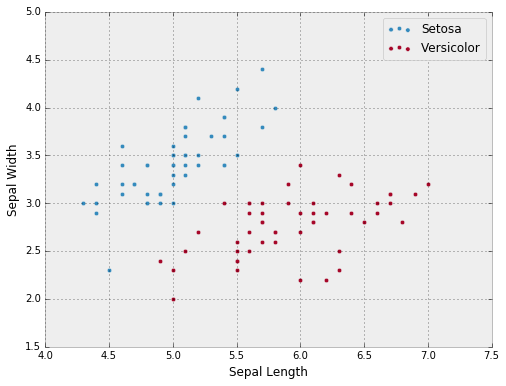

In [17]:
data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target[:100]

#348ABD
#A60628
#7A68A6
#467821

plt.figure( figsize = ( 8, 6 ) )
plt.scatter( X[ :50, 0 ], X[ :50, 1 ], label = 'Setosa', c = '#348ABD' )
plt.scatter( X[ 50:, 0 ], X[ 50:, 1 ], label = 'Versicolor', c = '#A60628' )
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Now this obviously is a toy example, but let's now think about how to create a learning algorithm to give us the probability that: Given the Sepal Width and Sepal Length of the plant tell us whether this plant is Setosa or Versicolor. So if our algorithm returns .9 we place 90% probability on the plant being Setosa and 10% probability on it being Versicolor.

## Logisitic Function

Let's start off by utilizing what we know from linear regression. Recall that for linear regression we would create the model using the following math formula:

$$x = \beta_{0} + \beta_{1}SW + \beta_{2}SL $$ 

- Where SW is our value for sepal width and SL is our value for sepal length. 

Basically we are assuming that x is a linear combination of our data plus an intercept. For example, say we have a plant with a sepal width of 3.5 and a sepal length of 5 and some oracle tells us that $\beta_{0} = 1$, $\beta_{1} = 2$, and $\beta_{2} = 4$. This would imply: 

$$x = 1 + (2 * 3.5) + (4 * 5) = 28$$ 

However, our final goal was to return a predicted value between 0 and 1 to make sure we are actually representing a probability. To do this we will make use of the logistic function. The logistic function mathematically looks like this: 

$$y = \frac{1}{1 + e^{-x}}$$ 

Let's take a look at the plot:

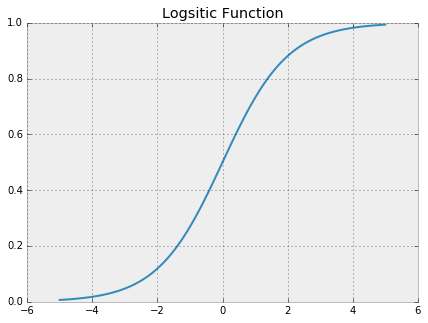

In [21]:
plt.figure( figsize = ( 7, 5 ) )
x_values = np.linspace( -5, 5, 100 )
y_values = [ 1 / (1 + np.exp(-x) ) for x in x_values ]
plt.plot( x_values, y_values )
plt.title('Logsitic Function')
plt.show()

You can see why this is a great function for a probability measure. The y-value represents the probability and it only ranges between 0 and 1. For an x value of zero you get a 0.5 probability. Also as you get more positive x value you get a higher probability, on the other hand a more negative x value results in a lower probability. Thus, plugging our original result into this logistic function gives: 

$$\frac{1}{1 + e^{-28}} = .99$$ 

So we would give a 99% probability to a plant with those dimensions as being Setosa.

## Defining The Cost Function

When utilizing logistic regression, we are trying to learn the $\beta$ values in order to maximize the probability of correctly classifying our plants. That is just the definition of our problem. Let's say someone did give us some $\beta$ values, how would we determine if they were good values or not? We saw above how to get the probability for one example. Now imagine we did this for all our plant observations - all 100. We would now have 100 probability scores. What we would hope is that for the Setosa plants, the probability values are close to 1 and for the Versicolor plants the probability is close to 0.

But we don't care about getting the correct probability for just one observation, we want to correctly classify all our observations. If we assume our data are independent and identically distributed (think of it as all of them are treated equally), we can just take the product of all our individually calculated probabilities and that is the **cost function we want to maximize**. So in math: 

$$\prod_{Setosa}\frac{1}{1 + e^{-(\beta_{0} + \beta_{1}SW + \beta_{2}SL)}}\prod_{Versicolor}1 - \frac{1}{1 + e^{-(\beta_{0} + \beta_{1}SW + \beta_{2}SL)}}$$ 

If we define the logistic function as: 

$$h(x) = \frac{1}{1 + e^{-x}}$$ 

and x as: 

$$x = \beta_{0} + \beta_{1}SW + \beta_{2}SL$$ 

This can be simplified to: 

$$\prod_{Setosa}h(x)\prod_{Versicolor}1 - h(x)$$ 

The $\prod$ symbol means take the product of the $h(x)$ for the observations that are classified as that plant. You will notice that for Versicolor observations we are taking 1 minus the logistic function. That is because we are trying to find a value to maximize, and since Versicolor observations should have a probability close to zero, 1 minus the probability should be close to 1. Next we will re-write the original cost function as:

$$\sum_{i=1}^{100}y_{i}log(h(x_{i})) + (1-y_{i})log(1-h(x_{i}))$$

Where:

- We define $y_{i}$ to be 1 when the observation is Setosa and 0 when Versicolor, then we only compute $h(x)$ for Setosa and $1 - h(x)$ for Versicolor, which is still the same idea as the original function. 
- Next we'll transform the original $h(x_{i})$ by taking the log. As we'll later see this logarithm transformation will make our cost function more convenient to work with, and because the logarithm is a monotonically increasing function, the logarithm of a function achieves its maximum value at the same points as the function itself. When we take the log our product across all data points (100 in this toy example), it becomes a sum. See [log rules](http://www.mathwords.com/l/logarithm_rules.htm) for more details (Hint: log(ab) = log(a) + log(b)).

## Gradient

So lets take the derivative of this new version of our cost function with respect to $\beta_{0}$. Remember that our $\beta_{0}$ is in our x value. So remember that the derivative of log(x) is $\frac{1}{x}$, so we get (for each observation): 

$$\frac{y_{i}}{h(x_{i})} + \frac{1-y_{i}}{1-h(x_{i})}$$ 

And using the [quotient rule](https://www.math.hmc.edu/calculus/tutorials/quotient_rule/) we see that the derivative of h(x) is:

$$\frac{e^{-x}}{(1+e^{-x})^{2}} = \frac{1}{1+e^{-x}}(1 - \frac{1}{1+e^{-x}}) = h(x)(1-h(x))$$ 

And the derivative of x with respect to $\beta_{0}$ is just 1. Putting it all together we get:

$$\frac{y_{i}h(x_{i})(1-h(x_{i}))}{h(x_{i})} - \frac{(1-y_{i})h(x_{i})(1-h(x_{i}))}{1-h(x_{i})}$$ 

Simplify to: 

$$y_{i}(1-h(x_{i})) - (1 - y_{i})h(x_{i}) = y_{i}-y_{i}h(x_{i}) - h(x_{i})+y_{i}h(x_{i}) = y_{i} - h(x_{i})$$

Bring in the neative and sum and we get the partial derivative with respect to $\beta_0$ to be:

$$\sum_{i=1}^{100}h(x_{i}) - y_{i}$$ 

Now the other partial derivaties are easy. The only change is now the derivative for $x_{i}$ is no longer 1. For $\beta_{1}$ it is $SW_{i}$ and for $\beta_{2}$ it is $SL_{i}$. 

So the partial derivative for $\beta_{1}$ is:

$$\sum_{i=1}^{100}(h(x_{i}) - y_{i})SW_{i}$$ 

For $\beta_{2}$: 

$$\sum_{i=1}^{100}(h(x_{i}) - y_{i})SL_{i}$$

##Step 3 - Gradient Descent

So now that we have our gradients, we can use the gradient descent algorithm to find the values for our $\beta$s that minimize our cost function. The gradient descent algorithm is very simple:
* Initially guess any values for your $\beta$ values
* Repeat until converge:
    * $\beta_{i} = \beta_{i} - (\alpha *$ gradient with respect to $\beta_{i})$ for $i = 0, 1, 2$ in our case

Here $\alpha$ is our learning rate. Basically how large of steps to take on our cost curve. What we are doing is taking our current $\beta$ value and then subtracting some fraction of the gradient. We subtract because the gradient is the direction of greatest increase, but we want the direction of greatest decrease, so we subtract. In other words, we pick a random point on our cost curve, check to see which direction we need to go to get closer to the minimum by using the negative of the gradient, and then update our $\beta$ values to move closer to the minimum. Repeat until converge means keep updating our $\beta$ values until our cost value converges - or stops decreasing - meaning we have reached the minimum. Also, it is important to update all the $\beta$ values at the same time. Meaning that you use the same previous $\beta$ values to update all the next $\beta$ values.

So now we know that we want to maximize the following: $$\prod_{Setosa}h(x)\prod_{Versicolor}1 - h(x)$$ 

## Reference

- [Other People's Notes on Logistic Regression](http://nbviewer.jupyter.org/github/tfolkman/learningwithdata/blob/master/Logistic%20Gradient%20Descent.ipynb)

http://sambfok.blogspot.tw/2012/08/partial-derivative-logistic-regression.html

https://www.youtube.com/watch?v=_7b352zYicY

http://localhost:8888/notebooks/washington-machine-learning-specialization/course-3/module-10-online-learning-assignment-blank.ipynb

http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb

https://github.com/justmarkham/DAT8#class-12-logistic-regression


http://blog.yhat.com/posts/logistic-regression-and-python.html